In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [5]:
#cols = ['Sex','Lenght','Diameter','Height','Whole weight','Sucked weight','Viscera weight',
     # 'Shell weight','Rings' ]
#data = pd.read_csv('abalone.data',sep=',',names=cols)

#data.head()
#df=pd.read_csv('abalone.csv')
names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
data = pd.read_csv("abalone.csv", header=None, names = names, sep =",")
data.head()



,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
print(data.shape)

(4177, 9)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
#replace_list = {"Sex" : {"M": 0, "F" : 1, "I": 2}}
#X_df.replace(replace_list,inplace=True)

In [10]:
data['Rings'].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

In [11]:
(data.Height ==0).sum()

2

In [12]:
data[data['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [13]:
means = pd.pivot_table(data,index=['Sex'],aggfunc={'Height':np.mean})
means

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


In [14]:
data['Height'] = data['Height'].replace(to_replace=0, value=0.0107996)

In [15]:
data = pd.get_dummies(data)
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [16]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
Length,1.000000,0.986812,0.827726,0.925261,0.897914,0.903018,0.897706,0.556720,0.309666,-0.551465,0.236543
Diameter,0.986812,1.000000,0.833861,0.925452,0.893162,0.899724,0.905330,0.574660,0.318626,-0.564315,0.240376
Height,0.827726,0.833861,1.000000,0.819408,0.775153,0.798497,0.817657,0.557576,0.298456,-0.518578,0.215450
Whole weight,0.925261,0.925452,0.819408,1.000000,0.969405,0.966375,0.955355,0.540390,0.299741,-0.557592,0.252038
Shucked weight,0.897914,0.893162,0.775153,0.969405,1.000000,0.931961,0.882617,0.420884,0.263991,-0.521842,0.251793
Viscera weight,0.903018,0.899724,0.798497,0.966375,0.931961,1.000000,0.907656,0.503819,0.308444,-0.556081,0.242194
Shell weight,0.897706,0.905330,0.817657,0.955355,0.882617,0.907656,1.000000,0.627574,0.306319,-0.546953,0.235391
Rings,0.556720,0.574660,0.557576,0.540390,0.420884,0.503819,0.627574,1.000000,0.250279,-0.436063,0.181831
Sex_F,0.309666,0.318626,0.298456,0.299741,0.263991,0.308444,0.306319,0.250279,1.000000,-0.464298,-0.512528
Sex_I,-0.551465,-0.564315,-0.518578,-0.557592,-0.521842,-0.556081,-0.546953,-0.436063,-0.464298,1.000000,-0.522541


<AxesSubplot:>

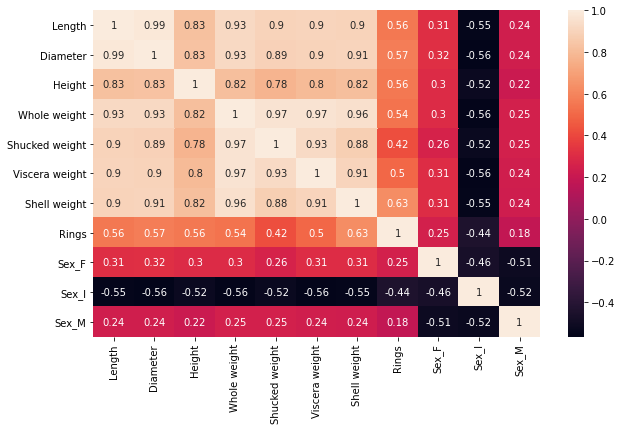

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [18]:
data.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.135994
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
dtype: float64

In [19]:
feature = data.drop('Rings', axis=1)
target = data['Rings']

x= feature.values
y= target.values

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
best_r_state=0
accu=0

for i in range(30,200):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=i)
    mod=LinearRegression()
    mod.fit(train_x,train_y)
    pred_y=mod.predict(test_x)
    tempaccu=r2_score(test_y,pred_y)
    if tempaccu>accu:
        accu=tempaccu
        best_r_state=i

print(f"Best random_state {best_r_state}")

Best random_state 30


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=30)

In [22]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.2622415669205658
[[ 0  0  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  9  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 21  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 16 41  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6 41 20 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23 55 50 11  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  6 28 55 50  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7 18 36 50 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  5 25 40 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  3  9 26 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  2  4 30 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  7  8  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 10  5  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  3  4  0  0  0  0  0  

In [23]:
lrscores=cross_val_score(lr,x,y,cv=6)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.20659971 0.27442529 0.26149425 0.24425287 0.27442529 0.26005747]
0.2535424809116245 0.02333730649012192


In [24]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.264417845484222
[[ 2  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 10  4  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  9  9  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10 20 28  1  3  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3 18 34 18  5  3  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7 29 42 40 17  3  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  2 10 22 47 42 15  6  2  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 10 42 40 24  6  4  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  7 21 29 24  5  3  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  2 13 13 14  7  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  5  9 19  2  4  5  2  4  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  2  6  5  3  1  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  4  5  6  2  2  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  1  0  1  0  2  0  1  1

In [25]:
rfscores=cross_val_score(rf,x,y,cv=6)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.18651363 0.27298851 0.23563218 0.26293103 0.26867816 0.27298851]
0.2499553367744631 0.031117973122049107


In [26]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.250272034820457
[[ 0  0  3  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6 10  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 23  6  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 20 32  1  5  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9 36 17 15  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24 48 42 25  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  4 19 44 75  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  9 45 63 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  4 21 48 17  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  2 10 30  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3 11 30  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  9 10  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  8 11  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  5  1  0  0  0  0  0  0

In [27]:
svcscores=cross_val_score(svc,x,y,cv=6)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.20946915 0.27586207 0.26149425 0.23850575 0.28304598 0.26724138]
0.2559364298004035 0.02501228495067337


In [28]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.2295973884657236
[[ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  8  5  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  4 10  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  8 27 20  3  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  7 25 23 18  6  2  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 14 31 38 34 15  3  2  2  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  5 10 31 47 30 18  1  2  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  6 17 39 36 21  3  5  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 15 23 28 14  7  3  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3  5 10 11 12  7  3  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6  9 10 16  4  2  2  2  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  2  5  6  2  0  1  1  1  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  5  4  3  1  1  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  2  0  2  0  0  0  2  

In [29]:
knnscores=cross_val_score(knn,x,y,cv=6)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.17073171 0.24425287 0.22557471 0.20545977 0.26436782 0.24856322]
0.22649168302027847 0.03106329856151125


In [30]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.11207834602829161
[[ 3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8 10  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2 17  6  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 10 15 26  9  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  5  8 28 22  9  0  0  0  0  0  0  0  0  0  0  0  0  0  8  3  0  0]
 [ 0  0  1 13 52 26  5  0  0  0  0  0  0  0  0  0  0  0  0 26 17  0  0]
 [ 0  0  3  3 16 19  8  0  0  0  0  0  0  0  0  0  0  0  0 42 57  0  0]
 [ 0  0  1  3 11 12 12  0  0  0  0  0  0  0  0  0  0  0  0 50 43  0  0]
 [ 0  0  0  0  6  8  5  0  1  0  0  0  0  0  0  0  0  0  0 36 37  0  0]
 [ 0  0  0  2  1  2  0  0  1  0  0  0  0  0  0  0  0  0  0 19 28  0  0]
 [ 0  0  0  0  2  2  1  0  1  0  0  0  0  0  1  0  0  0  0 18 28  0  0]
 [ 0  0  0  1  0  1  2  1  0  0  0  0  0  0  0  0  0  0  0 11  6  0  0]
 [ 0  0  0  0  1  3  1  0  1  0  0  0  0  0  0  0  0  0  0  9  7  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0 

In [31]:
gnbscores=cross_val_score(gnb,x,y,cv=6)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.06456241 0.10344828 0.11350575 0.10775862 0.10201149 0.11350575]
0.1007987158979095 0.0167975117232166


In [32]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.1882480957562568
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 1  1  1  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  2  7  6  1  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  5  9  6  6  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  9 18 22  8  4  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  1  0  4 17 22 16  9  6  5  1  2  1  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  1  5 30 34 33 17  9  3  4  0  1  1  0  2  0  0  0  0  0  0
   0]
 [ 0  0  0  0  2  2 13 20 33 27 23  9  7  4  6  0  1  1  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  1  8 14 32 26 13 16  8  5  3  3  1  1  1  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  4  5 19 24 13  8  5  3  3  5  0  2  0  0  1  0  1  0
   0]
 [ 0  0  0  0  0  2  4  2  7  9 12  3  2  4  4  1  0  0  1  1  0  0  1  0
   0]
 [ 0  0  0  0  0  0  

In [33]:
dtcscores=cross_val_score(dtc,x,y,cv=6)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.13629842 0.20114943 0.18534483 0.20258621 0.18534483 0.19396552]
0.18411487106757476 0.02242706668554801


In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
parameters ={'max_depth':np.arange(2,15),
           'criterion':['gini','entropy']}

In [36]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [37]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [38]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [39]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [40]:
accuracy_score(y_test,GCV_pred)

0.25571273122959737

In [41]:
import joblib
joblib.dump(GCV.best_estimator_,"abalonefinalDTC.pkl")

['abalonefinalDTC.pkl']